File/content/12345.nii 

**[粗體文字](https://)**

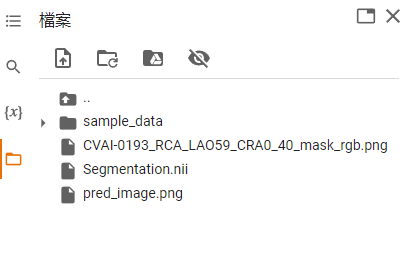

Import Package

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import nibabel as nib
import imageio  
%matplotlib inline

Define Function 

In [ ]:
def show(img_,text):
    print(text,img_.shape,np.amin(img_),np.amax(img_),img_.dtype)
    # plt.figure(figsize=(8,8))
    plt.imshow(img_)
    plt.title(text,fontsize=20)
    plt.xlabel(str(img_.shape))
    plt.ylabel(str(np.amin(img_))+' ~ '+str(np.amax(img_)))
    return

In [ ]:
def precision_recall_f1(label,pred):
    pr_image = np.zeros((512,512,3))
    TP,FP,FN = 0,0,0
    for i in range(512):
        for j in range(512):
            if label[i,j] ==1 and pred[i,j] ==1:
                pr_image[i,j] = (255,255,255)
                TP +=1
            elif label[i,j] ==0 and pred[i,j] ==1:
                pr_image[i,j] = (0,255,0)
                FP +=1
            elif label[i,j] ==1 and pred[i,j] ==0:
                pr_image[i,j] = (255,0,0)
                FN +=1
            
    plt.imshow(pr_image.astype('uint8'))
    plt.axis('off')
    th_precision = TP/(TP+FP)
    th_recall =TP/(TP+FN)
    th_f1 = 2*((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN)))

    return th_precision,th_recall,th_f1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

自己標註的nii檔案

In [ ]:
img =/content/drive/MyDrive/Segmentation30.nii
img_fdata = img.get_fdata()
print(img_fdata.shape)
label_img = img_fdata[:,:,0].T
show(label_img,'Label Mask')


NameError: ignored

Ground Truth 標準答案

In [ ]:
raw_mask = cv2.imread('/content/CVAI-0113_RCA_LAO56_CRA1_27_Label.png',flags=cv2.IMREAD_UNCHANGED)
show(raw_mask,'label Mask')

error: ignored

模型預測的結果 Model Prediction image

In [ ]:
pred_img = cv2.imread('/content/drive/MyDrive/Segmentation30.nii')
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2GRAY)/255
show(pred_img,'Pred Mask')

NameError: ignored

Grounf Truth (512, 512) 0.0 1.0 float64
Pred Mask (512, 512) 0.00392156862745098 1.0 float64
Label Mask (512, 512) 0.0 1.0 float64


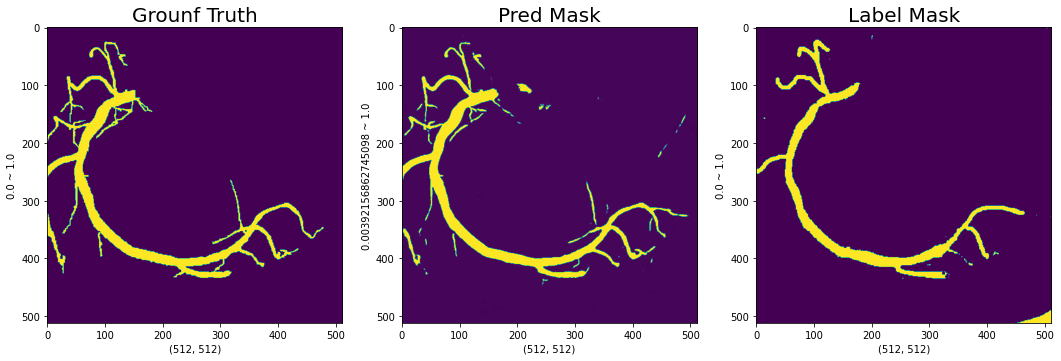

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
show(mask_img,'Grounf Truth')
plt.subplot(1,3,2)
show(pred_img,'Pred Mask')
plt.subplot(1,3,3)
show(label_img,'Label Mask')

標準答案跟Model Prediction 比較

Ground Truth (512, 512) 0.0 1.0 float64
Pred Mask (512, 512) 0.00392156862745098 1.0 float64

Threshold = 0.5
Precision 0.8997309318543737, Recall 0.8970709006296195, F1 Score/Dice 0.8983989472529882


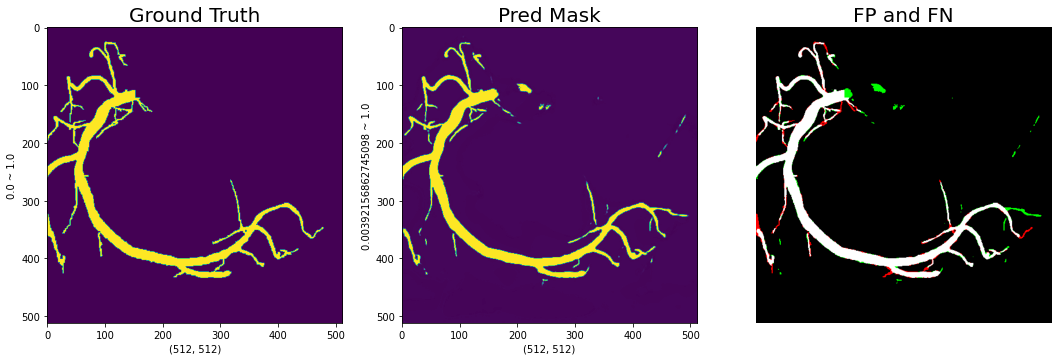

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
show(mask_img,'Ground Truth')
plt.subplot(1,3,2)
show(pred_img,'Pred Mask')
plt.subplot(1,3,3)
plt.title('FP and FN',fontsize=20)
pred_imgage2 = pred_img.copy()
threshold = 0.5
pred_imgage2[pred_imgage2>=threshold] = 1
pred_imgage2[pred_imgage2<threshold] = 0

precision_,recall_,f1_ = precision_recall_f1(mask_img,pred_imgage2)
print()
print('Threshold = {}'.format(threshold))
print("Precision {}, Recall {}, F1 Score/Dice {}".format(precision_,recall_,f1_))

標準答案跟  自己標註比較

Ground Truth (512, 512) 0.0 1.0 float64
Label Mask (512, 512) 0.0 1.0 float64

Threshold = 0.5
Precision 0.7963999190993056, Recall 0.6467560908842047, F1 Score/Dice 0.7138195661369267


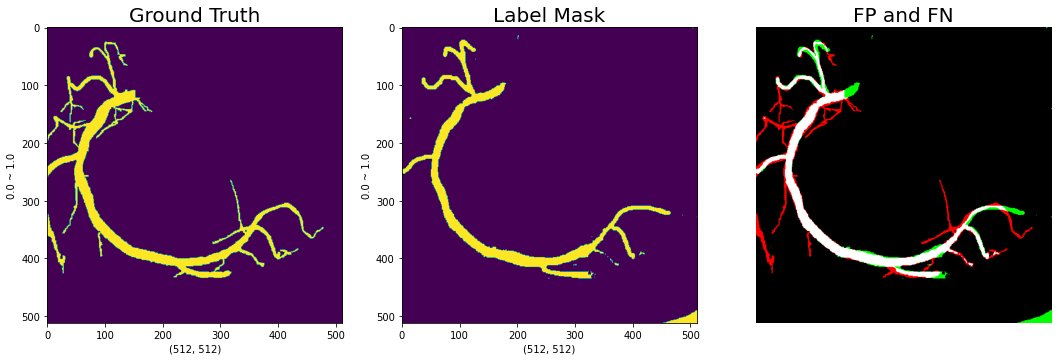

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
show(mask_img,'Ground Truth')
plt.subplot(1,3,2)
show(label_img,'Label Mask')
plt.subplot(1,3,3)
plt.title('FP and FN',fontsize=20)
pred_imgage2 = label_img.copy()
threshold = 0.5
pred_imgage2[pred_imgage2>=threshold] = 1
pred_imgage2[pred_imgage2<threshold] = 0

precision_,recall_,f1_ = precision_recall_f1(mask_img,pred_imgage2)
print()
print('Threshold = {}'.format(threshold))
print("Precision {}, Recall {}, F1 Score/Dice {}".format(precision_,recall_,f1_))